In [1]:
import pandas as pd
import numpy as np

## Setup Working DataFrame

In [2]:
results = pd.read_csv('../results.csv')

In [3]:
results = results.rename(columns={'Unnamed: 0': 'Model'})

In [4]:
results

,Model,Train r2,Train RMSE,Test r2,Test RMSE
0,KNRegressor_minmax,0.266946,40.771489,-0.091121,52.198470
1,KNRegressor_pca,0.267452,40.757392,-0.093154,52.247074
2,DecisionTree_standard,0.015645,47.245917,0.013386,49.635784
3,DecisionTree_robust,0.015399,47.251834,0.014689,49.603000
4,XGBoost,0.230241,41.779740,0.036613,49.048042
5,XGBoost_robust,0.230650,41.768656,0.036294,49.056157


In [5]:
# add new models for comparison
# columns: train r2, train rmse, test r2, test rmse
to_add = {'Ridge_Regression': [0.010463, 47.370106, 0.009814, 49.725557],
          'Lasso_StdScaler': [0.010462, 47.370118, 0.009822, 49.725355],
          'Elastic_Net': [0.010430, 47.370906, 0.009886, 49.723746]}
columns = ['Train r2', 'Train RMSE', 'Test r2', 'Test RMSE']

In [6]:
to_add_df = pd.DataFrame.from_dict(to_add, orient='index', columns=columns)
to_add_df = to_add_df.reset_index()
to_add_df = to_add_df.rename(columns={'index':'Model'})

In [7]:
to_add_df

,Model,Train r2,Train RMSE,Test r2,Test RMSE
0,Ridge_Regression,0.010463,47.370106,0.009814,49.725557
1,Lasso_StdScaler,0.010462,47.370118,0.009822,49.725355
2,Elastic_Net,0.010430,47.370906,0.009886,49.723746


In [8]:
final = pd.concat([results, to_add_df])

In [9]:
final

,Model,Train r2,Train RMSE,Test r2,Test RMSE
0,KNRegressor_minmax,0.266946,40.771489,-0.091121,52.198470
1,KNRegressor_pca,0.267452,40.757392,-0.093154,52.247074
2,DecisionTree_standard,0.015645,47.245917,0.013386,49.635784
3,DecisionTree_robust,0.015399,47.251834,0.014689,49.603000
4,XGBoost,0.230241,41.779740,0.036613,49.048042
5,XGBoost_robust,0.230650,41.768656,0.036294,49.056157
0,Ridge_Regression,0.010463,47.370106,0.009814,49.725557
1,Lasso_StdScaler,0.010462,47.370118,0.009822,49.725355
2,Elastic_Net,0.010430,47.370906,0.009886,49.723746


## Split into r2 and RMSE

In [10]:
# column filters
r2_cols = ['Model', 'Train r2', 'Test r2']
RMSE_cols = ['Model', 'Train RMSE', 'Test RMSE']

# separate into two dataframes
final_r2 = final[r2_cols]
final_RMSE = final[RMSE_cols]

In [17]:
final_r2 = final_r2.sort_values(by='Test r2', ascending=False)
final_RMSE = final_RMSE.sort_values(by='Test RMSE', ascending=True)

## r2 Plot

In [12]:
import matplotlib.pyplot as plt

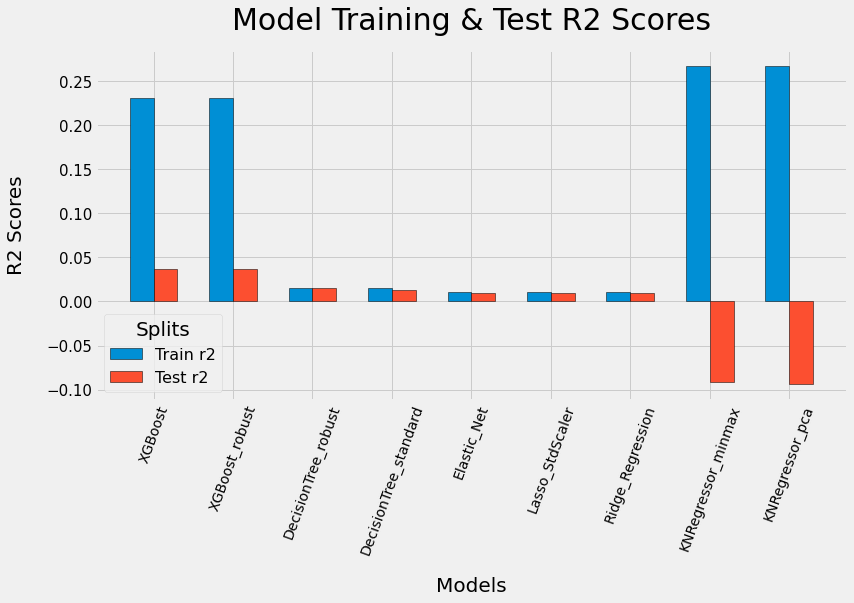

In [13]:
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")


#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (12,6))


#extract the labels
label = final_r2["Model"]


#use this to create x ticks to add the data to
x = np.arange(len(label))


#set a width for each bar 
width = 0.3


#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width/2,
               final_r2['Train r2'],
               width = width, 
               label = 'Train r2',
               edgecolor = "black")


#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x + width/2,
               final_r2['Test r2'],
               width = width,
               label = 'Test r2',
               edgecolor = "black")


#add the labels to the axis
ax.set_ylabel("R2 Scores",
              fontsize = 20,
              labelpad = 20)
ax.set_xlabel("Models",
              fontsize = 20,
              labelpad =20)
ax.set_title("Model Training & Test R2 Scores",
             fontsize = 30,
             pad = 20)


#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)


#add the legend
#using the labels of the bars
ax.legend(title = "Splits",
          fontsize = 16,
          title_fontsize = 20)


#adjust the tick paramaters
ax.tick_params(axis = "x",
               which = "both",
               labelrotation = 70)
ax.tick_params(axis = "y",
               which = "both",
               labelsize = 15)

## RMSE Plot

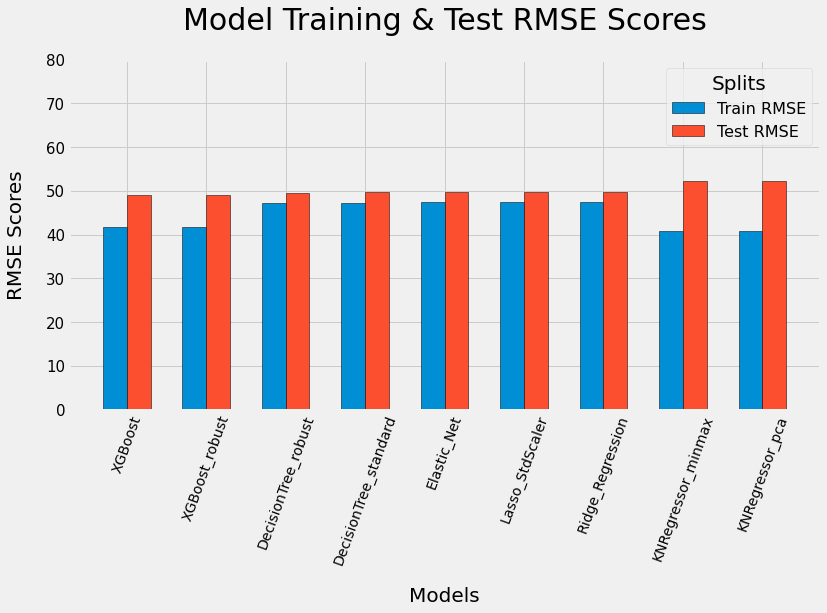

In [21]:
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")


#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (12,6))


#extract the labels
label = final_RMSE["Model"]


#use this to create x ticks to add the data to
x = np.arange(len(label))


#set a width for each bar 
width = 0.3


#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width/2,
               final_RMSE['Train RMSE'],
               width = width, 
               label = 'Train RMSE',
               edgecolor = "black")


#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x + width/2,
               final_RMSE['Test RMSE'],
               width = width,
               label = 'Test RMSE',
               edgecolor = "black")


#add the labels to the axis
ax.set_ylabel("RMSE Scores",
              fontsize = 20,
              labelpad = 20)
ax.set_xlabel("Models",
              fontsize = 20,
              labelpad = 20)
ax.set_title("Model Training & Test RMSE Scores",
             fontsize = 30,
             pad = 30)

#set ylim
ax.set_ylim(0, 80)


#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)


#add the legend
#using the labels of the bars
ax.legend(title = "Splits",
          fontsize = 16,
          title_fontsize = 20)


#adjust the tick paramaters
ax.tick_params(axis = "x",
               which = "both",
               labelrotation = 70)
ax.tick_params(axis = "y",
               which = "both",
               labelsize = 15)